In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from scipy import signal
import h5py, time

In [3]:
import sys
sys.path.append('/home/analysis_user/New_trap_code/Tools/')
import BeadDataFile
from discharge_tools import *

In [172]:
%matplotlib notebook

No cantilever data


<IPython.core.display.Javascript object>


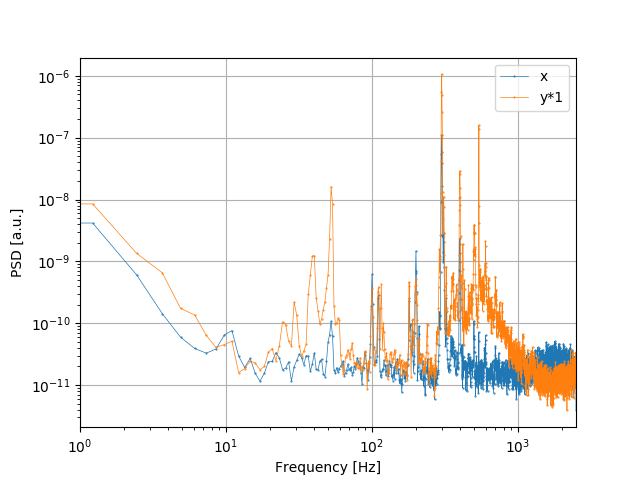

300.29296875 maximum x
300.29296875 maximum y
4.006584032377411e-12 minimum x
3.8903038044125625e-12 minimum y


In [351]:
fname = r'/home/data_transfer/data_from_windows/20191027/Bead3/InitialTest/Data5.h5'
BDF = BeadDataFile.BeadDataFile(fname)
fsamp=5000
res = 2**12
#res=50000
data=BDF.xyz2
data_det=signal.detrend(data)
y_1000=1*data_det[1]
z_1000=100*data_det[2]
xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res)
ypsd, freqs = matplotlib.mlab.psd(y_1000, Fs = fsamp, NFFT = res)
zpsd, freqs = matplotlib.mlab.psd(z_1000, Fs = fsamp, NFFT = res)

_,ax = plt.subplots()
ax.loglog(freqs, xpsd, '.-', label="x",markersize=1,linewidth=0.5)
ax.loglog(freqs, ypsd, '.-', label="y*1",markersize=1,linewidth=0.5)
# ax.loglog(freqs, zpsd, '.-', label="z*100",markersize=1,linewidth=0.5)
ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
plt.xlim(1,2500)
# plt.ylim(1e4,5*np.max(ypsd))
plt.grid(True)
print(freqs[np.argmax(xpsd)], "maximum x")
print(freqs[np.argmax(ypsd)], "maximum y")
print(np.min(xpsd), "minimum x")
print(np.min(ypsd), "minimum y")

In [227]:
f = h5py.File(fname,'r')
pos_data = np.array(f['pos_data'])
quad_data = np.array(f['quad_data']) 
amp = quad_data.reshape(-1,12).T[:5]
amp[1] = np.roll(amp[2],0)
amp[3] = np.roll(amp[3],0)
phase = quad_data.reshape(-1,12).T[5:10]/2**16/100

<IPython.core.display.Javascript object>


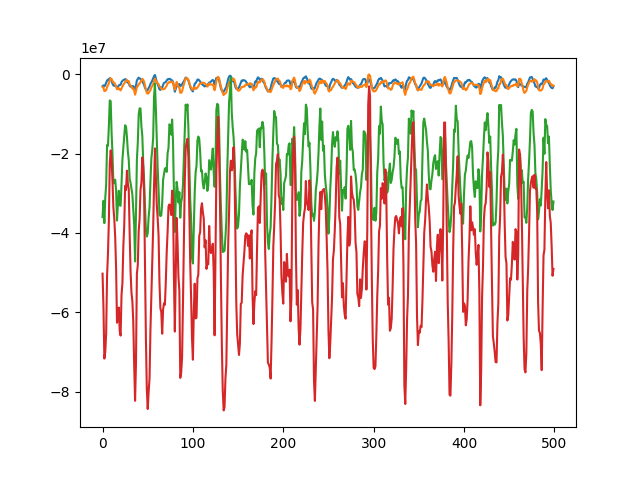

array([ 1.83444887e+08,  2.03815432e+08,  1.86546408e+09, -9.54978068e+08,
        6.90240783e+08])

In [310]:
from scipy import signal
# amp_det = np.array([signal.detrend(amp_) for amp_ in amp])
_,ax = plt.subplots()
[ax.plot(range(500),phase_[:500]-np.mean(phase_)) for phase_ in amp[:4]]
np.mean(amp,axis=1)

In [388]:
f = h5py.File(fname,'r')
pos_data = np.array(f['pos_data'])
quad_data = np.array(f['quad_data']) 
amp = quad_data.reshape(-1,12).T[:5]
phase = quad_data.reshape(-1,12).T[5:10]/2**16/100

In [389]:
new_amp = amp
new_amp[2] = new_amp[2]*1.5*1.5
new_amp[3] = new_amp[3]*1.5
right = new_amp[0] + new_amp[1]
left = new_amp[2] + new_amp[3]
top = new_amp[0] + new_amp[2]
bottom = new_amp[1] + new_amp[3]
quad_sum = right + left
x2 = (right - left)/quad_sum
y2 = (top - bottom)/quad_sum    
z2 = phase[4]   
new_xyz = np.array([x2, y2, z2])

<IPython.core.display.Javascript object>


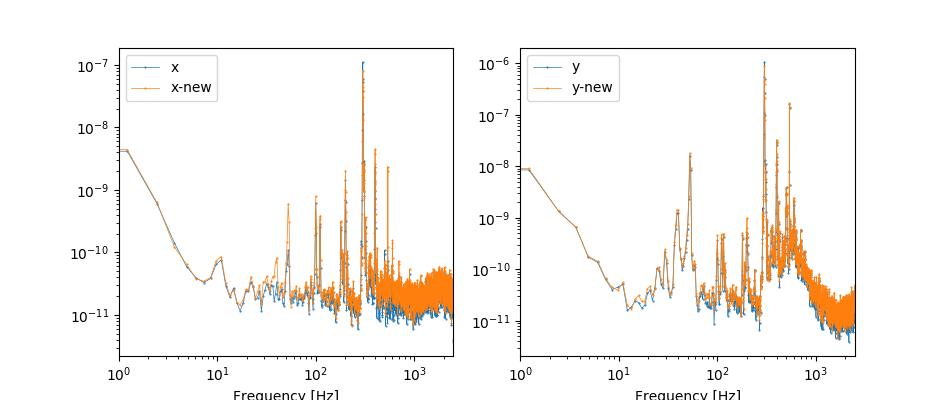

300.29296875 maximum x
300.29296875 maximum y
4.006584032377411e-12 minimum x
3.8903038044125625e-12 minimum y


In [390]:
data=new_xyz
data_det=signal.detrend(data)
y_1000=1*data_det[1]
z_1000=100*data_det[2]
xpsd1, freqs1 = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res)
ypsd1, freqs1 = matplotlib.mlab.psd(y_1000, Fs = fsamp, NFFT = res)
zpsd1, freq1s = matplotlib.mlab.psd(z_1000, Fs = fsamp, NFFT = res)

_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].loglog(freqs, xpsd, '.-', label="x",markersize=1,linewidth=0.5)
ax[0].loglog(freqs1, xpsd1, '.-', label="x-new",markersize=1,linewidth=0.5)

ax[1].loglog(freqs, ypsd, '.-', label="y",markersize=1,linewidth=0.5)
ax[1].loglog(freqs1, ypsd1, '.-', label="y-new",markersize=1,linewidth=0.5)
# ax.loglog(freqs, zpsd, '.-', label="z*100",markersize=1,linewidth=0.5)
[a.legend() for a in ax]
[a.set(xlabel='Frequency [Hz]',xlim=(1,2500)) for a in ax]
# plt.ylim(1e4,5*np.max(ypsd))
# plt.grid(True)
print(freqs[np.argmax(xpsd)], "maximum x")
print(freqs[np.argmax(ypsd)], "maximum y")
print(np.min(xpsd), "minimum x")
print(np.min(ypsd), "minimum y")